In [6]:
import zipfile

In [7]:
import numpy
numpy.__version__

'1.23.5'

In [8]:
pip install --upgrade h5py numpy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 44.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 111.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successfully uninstalled h5py-3.9.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
cupy-cuda11x 11.0.0 requires numpy<1.26,>=1.20, but you have numpy 1.26.1 which is incompatible.
numba 0.56.4 requires numpy<1.24,>=1.18, but yo

In [9]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
from PIL import Image
import warnings
warnings.filterwarnings("ignore")

In [10]:
!ls


sample_data


In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
!unzip /content/insects.zip


unzip:  cannot find or open /content/insects.zip, /content/insects.zip.zip or /content/insects.zip.ZIP.


In [13]:
!unzip insects.zip
!pwd


unzip:  cannot find or open insects.zip, insects.zip.zip or insects.zip.ZIP.
/content


In [14]:
#image_dataset = tf.keras.preprocessing.image_dataset_from_directory("/content/drive/MyDrive/insect project/insectimages1",shuffle=True,image_size=(IMAGE_SIZE, IMAGE_SIZE),batch_size=BATCH_SIZE)
import tensorflow as tf

# Define your image size and batch size
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32

# Specify the correct path to your image dataset directory
image_dataset = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/insect project/insectimages1",
    shuffle=True,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE
)


Found 288 files belonging to 3 classes.


In [15]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow.keras

In [16]:
from google.colab import drive


In [17]:
from google.colab import drive


In [18]:
import os

folder_path = '/content/drive/MyDrive/insect project/insectimages1'
files = os.listdir(folder_path)

for file in files:
    print(file)


testing-20231002T044812Z-001
training-20231002T044812Z-001
validation-20231002T045200Z-001


In [19]:
BATCH_SIZE=32
IMAGE_SIZE=256
image_dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/insect project/insectimages1",
  shuffle=True,
  image_size=(IMAGE_SIZE,IMAGE_SIZE),
  batch_size=BATCH_SIZE,
)
BATCH_SIZE=8

Found 288 files belonging to 3 classes.


In [20]:
import os
data_dir="/content/drive/MyDrive/insect project/insectimages1"
print("number of samples in--")
for f in os.listdir(data_dir +'/'):
    if os.path.isdir(data_dir+'/'+f):
        print('\n'+f.upper())
        for fx in os.listdir(data_dir+'/'+f+'/'):
            print(fx,":",len(os.listdir(data_dir+'/'+f+'/'+fx+'/')))

number of samples in--

TESTING-20231002T044812Z-001
testing : 10

TRAINING-20231002T044812Z-001
training : 10

VALIDATION-20231002T045200Z-001
validation : 10


In [21]:
!ls "/content/drive/MyDrive/insect project/insectimages1"


testing-20231002T044812Z-001  training-20231002T044812Z-001  validation-20231002T045200Z-001


In [22]:
batch = 8
print("Train dataset:")
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir + '/training-20231002T044812Z-001',
    batch_size=batch
)
print("Validation dataset")
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir + '/validation-20231002T045200Z-001',
    batch_size=batch
)
print("Test dataset")
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir + '/testing-20231002T044812Z-001',
    batch_size=batch
)


Train dataset:
Found 203 files belonging to 1 classes.
Validation dataset
Found 40 files belonging to 1 classes.
Test dataset
Found 45 files belonging to 1 classes.


In [23]:
#looking into the class names
class_names=train_ds.class_names
print(class_names)

['training']


In [24]:
# num_samples = 3
# for x in class_names:
#     plt.figure(figsize=(10, 10))
#     class_directory = os.path.join(data_dir)
#     filenames = os.listdir(class_directory)
#     for i in range(num_samples):
#         ax = plt.subplot(1, num_samples, i + 1)
#         img = Image.open(os.path.join(class_directory, filenames[i]))
#         plt.imshow(img)
#         plt.title(x)
#         plt.axis("off")

import os
from PIL import Image
import matplotlib.pyplot as plt

num_samples = 3  # Define the number of samples per class

# Assuming you have a list of class names
class_names = ["class1", "class2", "class3"]

# Define the path to your data directory
data_dir = "/content/drive/MyDrive/insect project/insectimages1"

for x in class_names:
    class_directory = os.path.join(data_dir, x)

    if not os.path.exists(class_directory):
        print(f"Directory '{class_directory}' not found.")
        continue

    filenames = os.listdir(class_directory)
    plt.figure(figsize=(10, 10))

    for i in range(num_samples):
        ax = plt.subplot(1, num_samples, i + 1)
        img = Image.open(os.path.join(class_directory, filenames[i]))
        plt.imshow(img)
        plt.title(x)
        plt.axis("off")

    plt.show()



Directory '/content/drive/MyDrive/insect project/insectimages1/class1' not found.
Directory '/content/drive/MyDrive/insect project/insectimages1/class2' not found.
Directory '/content/drive/MyDrive/insect project/insectimages1/class3' not found.


In [25]:
#preprocessing
#looking into the shape of the batches and individual samples
#set the input shape
print(" into the shape of images and lables in one batch\n")

for image_batch,labels_batch in train_ds:
    input_shape=image_batch[0].shape
    print("shape of the imges input for one batch:",image_batch.shape)
    print("shape of the images labels for one batch:",labels_batch.shape)
    break

 into the shape of images and lables in one batch

shape of the imges input for one batch: (8, 256, 256, 3)
shape of the images labels for one batch: (8,)


In [26]:
#Normalization the pixel values
normalization_layer=layers.experimental.preprocessing.Rescaling(1./255)

train_ds=train_ds.map(lambda x,y:(normalization_layer(x), y))
val_ds=val_ds.map(lambda x,y:(normalization_layer(x), y))
test_ds=test_ds.map(lambda x,y:(normalization_layer(x), y))

In [27]:
#Augmenting images in the train set to increase dataset size

data_augmentation=tf.keras.Sequential(
    [
        layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
        layers.experimental.preprocessing.RandomZoom(0.1),
        layers.experimental.preprocessing.RandomRotation((-0.1,0.1))
    ])

print("train size(number of batches) before augmnetation:",len(train_ds))

#apply only to tain set
aug_ds=train_ds.map(lambda x,y:(data_augmentation(x,training=True),y))

print("size (number of batches) of augmented dataset:",len(aug_ds))

#adding to train_ds
train_ds=train_ds.concatenate(aug_ds)

print("train size (number of batches) after augmentation:",len(train_ds))

train size(number of batches) before augmnetation: 26
size (number of batches) of augmented dataset: 26
train size (number of batches) after augmentation: 52


In [28]:
#THE MODEL
base_model=tensorflow.keras.applications.VGG16(weights="imagenet",input_shape=input_shape,include_top=False)

base_model.trainable=False

inputs=tensorflow.keras.Input(shape=input_shape)

x=base_model(inputs,training=False)
x=tensorflow.keras.layers.GlobalAveragePooling2D()(x)
outputs=tensorflow.keras.layers.Dense(len(class_names),activation="softmax")(x)

model=tensorflow.keras.Model(inputs,outputs)

cb=[EarlyStopping(monitor="val_loss",patience=5,restore_best_weights=True)]
model.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 global_average_pooling2d (  (None, 512)               0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 3)                 1539      
                                                                 
Total params: 14716227 (56.14 MB)
Trainable params: 1539 (6.01 KB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [31]:
model.compile(loss=SparseCategoricalCrossentropy(), optimizer=Adam(0.01) ,metrics=['accuracy'])
history1 = model.fit(train_ds, validation_data = val_ds,epochs=32,callbacks=cb)

Epoch 1/32
52/52 [==============================] - 231s 4s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/32
52/52 [==============================] - 220s 4s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/32
52/52 [==============================] - 221s 4s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/32
52/52 [==============================] - 221s 4s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/32
52/52 [==============================] - 221s 4s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/32
52/52 [==============================] - 221s 4s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000


In [34]:
model.compile(loss=SparseCategoricalCrossentropy(),optimizer=Adam(0.001),metrics=['accuracy'])

history2=model.fit(train_ds,validation_data=val_ds,epochs=32,callbacks=cb)

Epoch 1/32
52/52 [==============================] - 263s 4s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/32
52/52 [==============================] - 222s 4s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/32
52/52 [==============================] - 223s 4s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/32
52/52 [==============================] - 224s 4s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/32
52/52 [==============================] - 223s 4s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/32
52/52 [==============================] - 221s 4s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000


In [ ]:
model.evaluate(test_ds)

6/6 [==============================] - 39s 6s/step - loss: 1.6215 - accuracy: 0.5333


[1.6214855909347534, 0.5333333611488342]

In [ ]:
#plotting the metrics
def plot(history1,history2,variable1,variable2):
    #combining metrics from both trainings
    var1_history=history1[variable1]
    var1_history.extend(history2[variable2])

    var2_history=history1[variable2]
    var2_history.extend(history2[variable2])

    #plotting them
    plt.plot(range(len(var1_history)),var1_history)
    plt.plot(range(len(var2_history)),var2_history)
    plt.legend([variable1,variable2])
    plt.title(variable1)

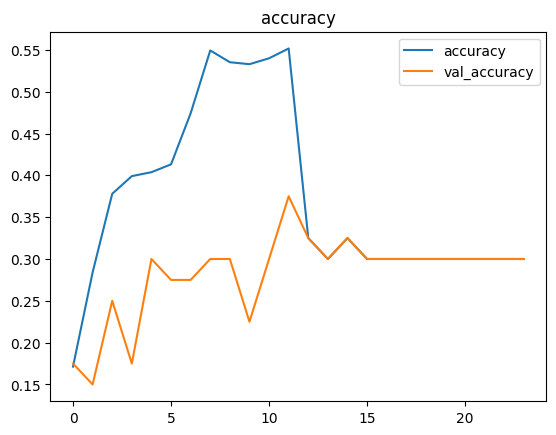

In [ ]:
plot(history1.history,history2.history,"accuracy","val_accuracy")

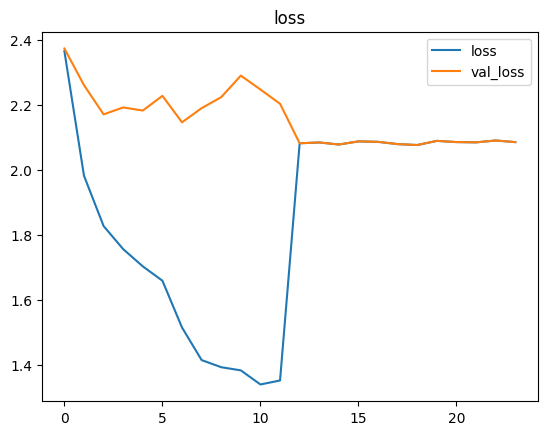

In [ ]:
plot(history1.history,history2.history,"loss",'val_loss')

1/1 [==============================] - 1s 659ms/step


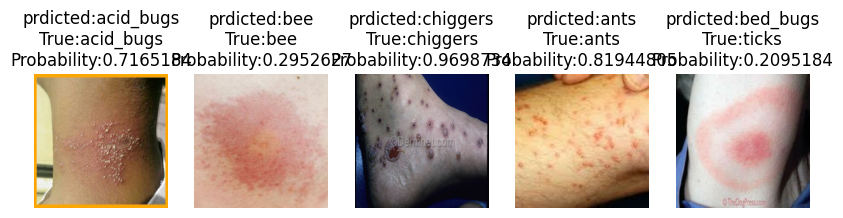

In [ ]:
#prediction
#prediction for all samples in the dataset

plt.figure(figsize=(10,10))

for i in test_ds.as_numpy_iterator():
    img,label= i
    for x in range(len(label)):
        ax = plt.subplot(1, len(label),x + 1)
        plt.axis('off')
        plt.imshow(img[x])
        output=model.predict(np.expand_dims(img[x],0))
        pred=np.argmax(output[0])
        t="prdicted:"+ class_names[pred]
        t=t+"\nTrue:"+ class_names[label[x]]
        t=t+"\nProbability:"+ str(output[0][pred])
        plt.title(t)

1/1 [==============================] - 1s 1s/step


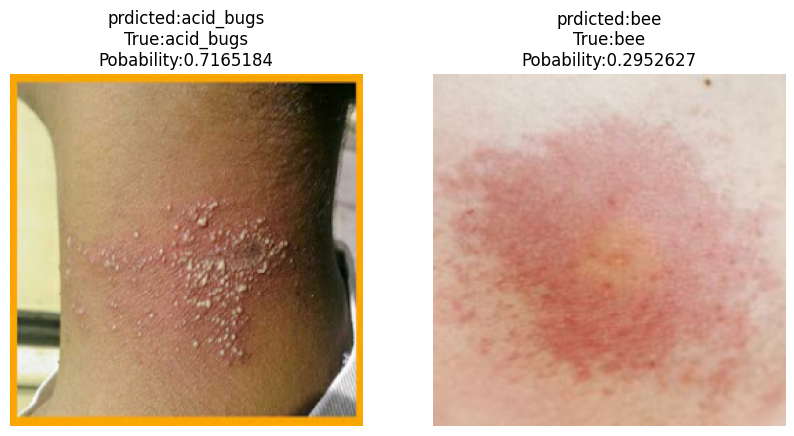

In [ ]:
samples=2
plt.figure(figsize=(10,10))
for i in test_ds.as_numpy_iterator():
  img,
  for x in range(samples):
    ax=plt.subplot(1,samples,x+1)
    plt.axis('off')
    plt.imshow(img[x])
    output=model.predict(np.expand_dims(img[x],0))
    pred=np.argmax(output[0])
    t="prdicted:"+ class_names[pred]
    t=t+"\nTrue:"+ class_names[label[x]]
    t=t+"\nPobability:"+ str(output[0][pred])
    plt.title(t)